In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialization of Parameters

In [6]:
doors = np.array([0, 1, 2])

switch_iters, stay_iters = 50_000_000, 50_000_000

switch_correct_count = 0
stay_correct_count = 0

for i in range(switch_iters):
    og_choice = np.random.randint(0 ,3)
    correct_choice = random.choice(doors)
    host_choice = host(og_choice, correct_choice, doors)
    
    switched_opt = switch(doors, og_choice, host_choice)

    if i % 1_000_000 == 0:  # print every million
        print(f"Switch Iteration: {i}")

    if (switched_opt == correct_choice):
        switch_correct_count += 1

for _ in range(stay_iters):

    og_choice = np.random.randint(0 ,3)
    correct_choice = random.choice(doors)
    host_choice = host(og_choice, correct_choice, doors)
    
    stay_opt = switch(doors, og_choice, host_choice)

    if _ % 1_000_000 == 0:  # print every million
        print(f"Switch Iteration: {_}")

    if (switched_opt == correct_choice):
        stay_correct_count += 1
        

print(f"Switch Count: {switch_correct_count}, Stay Count: {stay_correct_count}")


Switch Iteration: 0
Switch Iteration: 1000000
Switch Iteration: 2000000
Switch Iteration: 3000000
Switch Iteration: 4000000
Switch Iteration: 5000000
Switch Iteration: 6000000
Switch Iteration: 7000000
Switch Iteration: 8000000
Switch Iteration: 9000000
Switch Iteration: 10000000
Switch Iteration: 11000000
Switch Iteration: 12000000
Switch Iteration: 13000000
Switch Iteration: 14000000
Switch Iteration: 15000000
Switch Iteration: 16000000
Switch Iteration: 17000000
Switch Iteration: 18000000
Switch Iteration: 19000000
Switch Iteration: 20000000
Switch Iteration: 21000000
Switch Iteration: 22000000
Switch Iteration: 23000000
Switch Iteration: 24000000
Switch Iteration: 25000000
Switch Iteration: 26000000
Switch Iteration: 27000000
Switch Iteration: 28000000
Switch Iteration: 29000000
Switch Iteration: 30000000
Switch Iteration: 31000000
Switch Iteration: 32000000
Switch Iteration: 33000000
Switch Iteration: 34000000
Switch Iteration: 35000000
Switch Iteration: 36000000
Switch Iteration:

# When Player choose to switch

In [2]:
def switch(doors, og_choice, host_choice):
    available_opt = np.arange(len(doors))
    mask = (available_opt != og_choice) & (available_opt != host_choice)
    switched_opt = available_opt[mask][0]
    return switched_opt

# When player doesnt choose to switch

In [3]:
def stay(og_choice):
    stayed_choice = og_choice
    return stayed_choice

# Define Host (Monty)

In [4]:
def host(choice, correct_choice, doors):
    all_doors = np.arange(len(doors))
    mask = (all_doors != choice) & (all_doors != correct_choice)
    host = all_doors[mask][0]
    return host

# Plotting

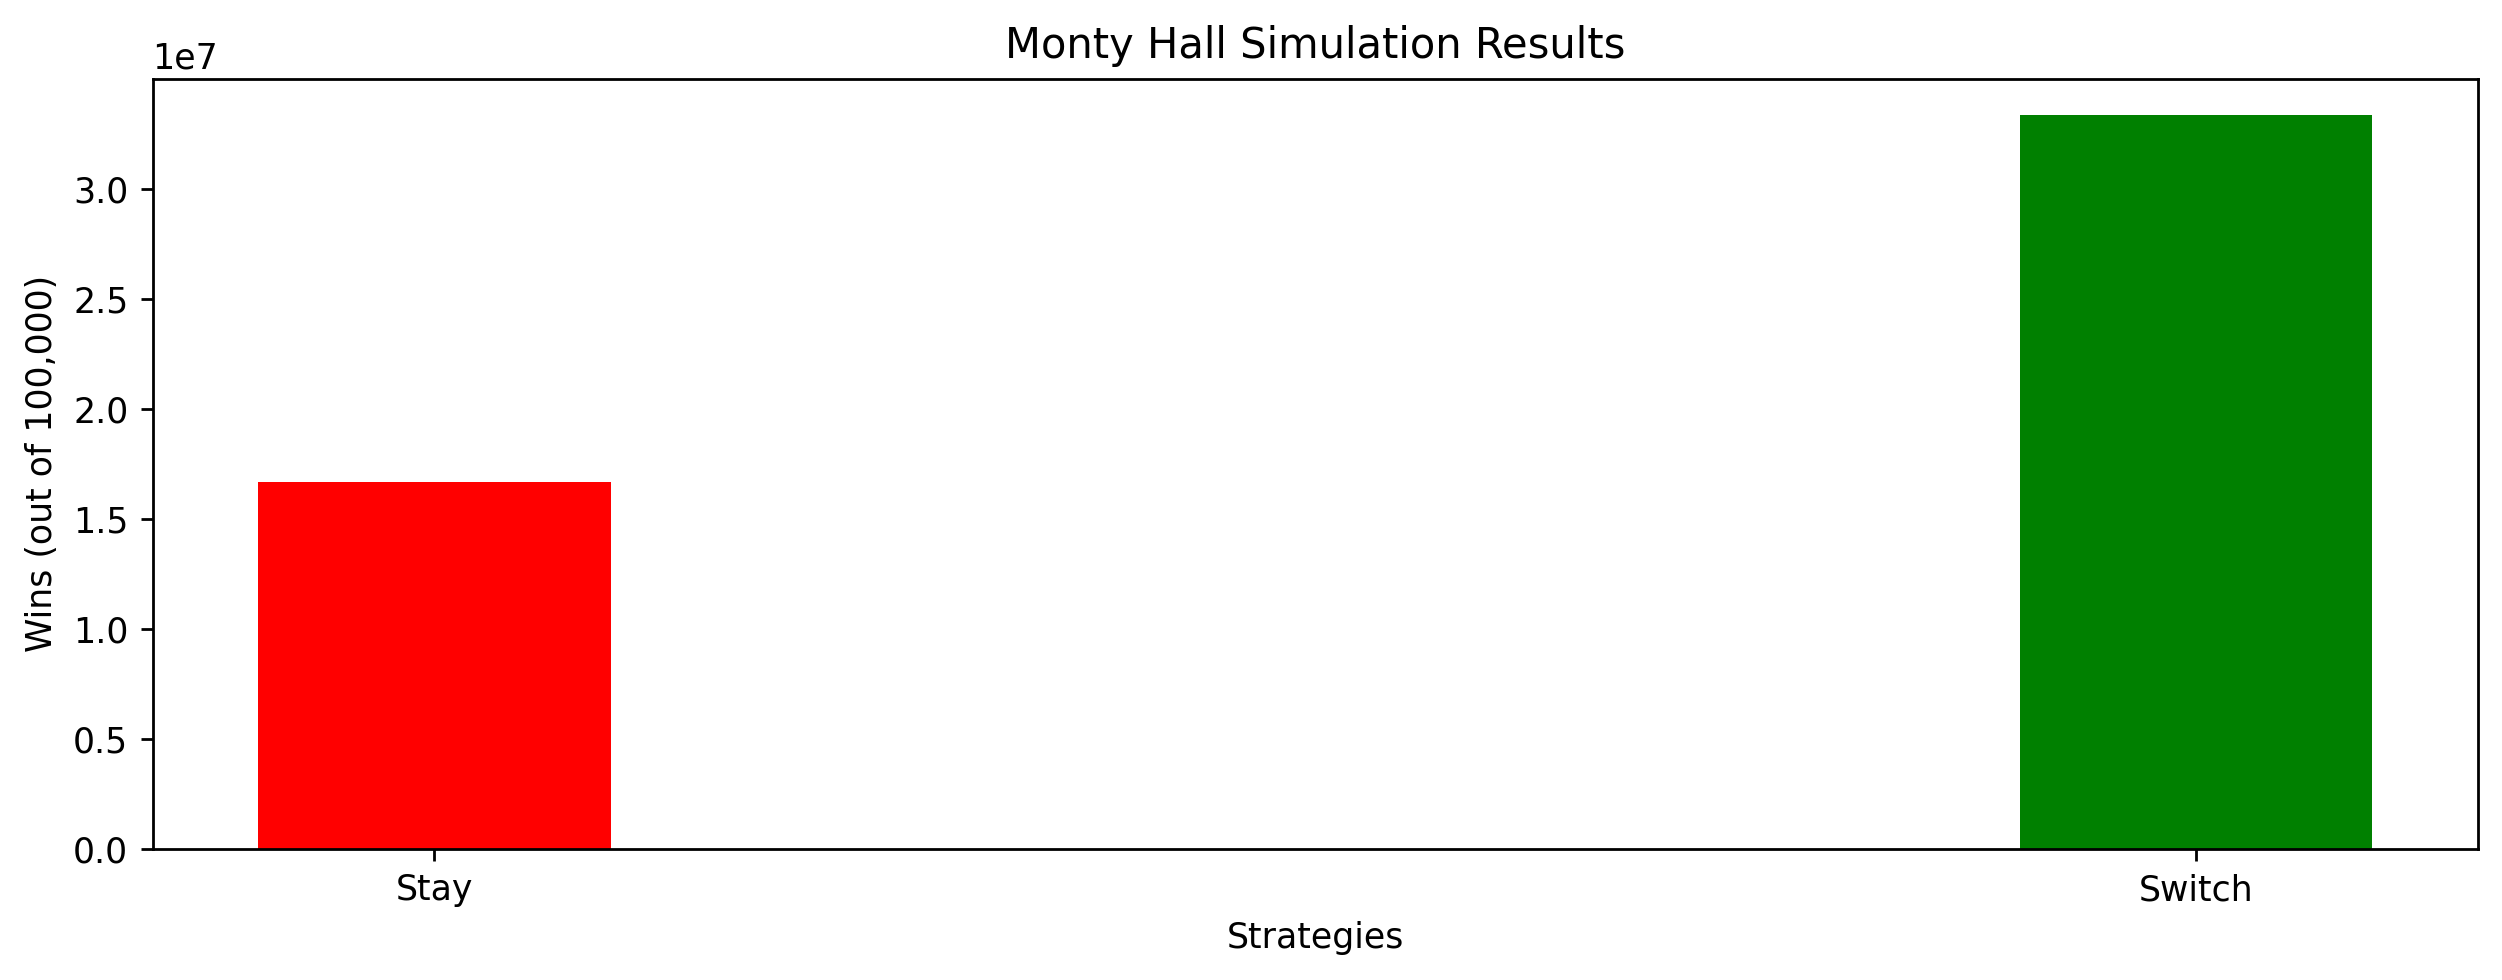

In [7]:
strategies = ["Stay", "Switch"]
wins = [stay_correct_count, switch_correct_count]

# Plot
plt.figure(figsize = (12,4), dpi = 250)
plt.bar(strategies, wins, color=["red", "green"], width = 0.2)
plt.ylabel("Wins (out of 100,000)")
plt.xlabel("Strategies")
plt.title("Monty Hall Simulation Results")
plt.show()